In [1]:
'''
Detecting Data Fraud Case Study
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_json('/home/david/Documents/temp/data.json')
df.head()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,...,"[{'event_id': 527017, 'cost': 25.0, 'availabil...",36,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL
1,premium,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,...,"[{'event_id': 786878, 'cost': 35.0, 'availabil...",149,1280942776,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC
2,premium,1296172800,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,...,"[{'event_id': 787337, 'cost': 93.51, 'availabi...",214,1272559388,3,10100 Pioneer Blvd Suite 100,US,33.944201,-118.080419,Los Angeles County Office of Education,CA
3,premium,1388966400,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,1360681570,...,"[{'event_id': 885645, 'cost': 25.0, 'availabil...",889,1283870102,3,,None,NaN,NaN,None,None
4,premium,1297900800,2417,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,1291994666,...,"[{'event_id': 1114349, 'cost': 150.0, 'availab...",35,1288984065,3,One Marina Park Drive,US,42.353848,-71.044276,Fish & Richardson,MA


In [3]:
df.acct_type.value_counts()

premium             12373
fraudster_event       851
fraudster             437
spammer_limited       218
spammer_warn          144
tos_warn               91
spammer_noinvite       84
tos_lock               77
locked                 54
fraudster_att           5
spammer_web             2
spammer                 1
Name: acct_type, dtype: int64

In [4]:
#df.info()

In [5]:
df['fraud'] = np.where((df.acct_type == 'fraudster_event')
                       | (df.acct_type == 'fraudster')
                       | (df.acct_type == 'fraudster_att')
                       , 1
                       , 0
                      )
df.head()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,fraud
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,...,36,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL,1
1,premium,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,...,149,1280942776,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC,0
2,premium,1296172800,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,...,214,1272559388,3,10100 Pioneer Blvd Suite 100,US,33.944201,-118.080419,Los Angeles County Office of Education,CA,0
3,premium,1388966400,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,1360681570,...,889,1283870102,3,,None,NaN,NaN,None,None,0
4,premium,1297900800,2417,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,1291994666,...,35,1288984065,3,One Marina Park Drive,US,42.353848,-71.044276,Fish & Richardson,MA,0


In [6]:
df.fraud.value_counts()

0    13044
1     1293
Name: fraud, dtype: int64

In [7]:
# downsample
df = df.groupby('fraud').apply(lambda x: x.sample(n=1293)).reset_index(drop=True)
df.head()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,fraud
0,tos_lock,1347148800,23461,8,US,USD,0.0,"<p style=""text-align: center;""><span class=""cf...",certifiedforensicloanauditors.com,1342819690,...,998,1256576963,1,370 Hughes Center Dr.,US,36.115838,-115.155964,Residents Inn Marriott,NV,0
1,premium,1349938500,3893,0,US,USD,0.0,<p>Celebrate and explore erotic energy and tou...,intimacyforumtraining.com,1349202094,...,846,1276068046,4,,US,37.906037,-122.544976,"Gorgeous Mountaintop Home, Mill Valley, CA (Pl...",CA,0
2,premium,1363838400,21761,0,US,USD,0.0,"<p style=""margin-bottom: 0.7em; padding-bottom...",gmail.com,1362797769,...,796,1293986416,3,,US,40.714353,-74.005973,,,0
3,premium,1373014800,804,13,US,USD,0.0,<p>$7 in advance!<br />$10 at the door!</p>\r\...,gmail.com,1367871128,...,146,1355270293,4,112 Esplanade Alley,US,38.044359,-84.494495,Natasha's Bistro & Bar,KY,0
4,premium,1367445600,7193,8,US,USD,1.0,"<p style=""line-height: 1.15; margin-top: 0pt; ...",generalassemb.ly,1365707772,...,765,1299651441,3,,None,NaN,NaN,None,None,0


In [8]:
df.shape

(2586, 45)

In [9]:
df.fraud.value_counts()

1    1293
0    1293
Name: fraud, dtype: int64

In [10]:
df_fraud = df[df.fraud == 1]
df_fraud.shape

(1293, 45)

In [11]:
df_true = df[df.fraud != 1]
df_true.shape

(1293, 45)

In [12]:
df.columns

Index(['acct_type', 'approx_payout_date', 'body_length', 'channels', 'country',
       'currency', 'delivery_method', 'description', 'email_domain',
       'event_created', 'event_end', 'event_published', 'event_start',
       'fb_published', 'gts', 'has_analytics', 'has_header', 'has_logo',
       'listed', 'name', 'name_length', 'num_order', 'num_payouts',
       'object_id', 'org_desc', 'org_facebook', 'org_name', 'org_twitter',
       'payee_name', 'payout_type', 'previous_payouts', 'sale_duration',
       'sale_duration2', 'show_map', 'ticket_types', 'user_age',
       'user_created', 'user_type', 'venue_address', 'venue_country',
       'venue_latitude', 'venue_longitude', 'venue_name', 'venue_state',
       'fraud'],
      dtype='object')

In [13]:
df.iloc[3]


acct_type                                                       premium
approx_payout_date                                           1373014800
body_length                                                         804
channels                                                             13
country                                                              US
currency                                                            USD
delivery_method                                                       0
description           <p>$7 in advance!<br />$10 at the door!</p>\r\...
email_domain                                                  gmail.com
event_created                                                1367871128
event_end                                                    1372582800
event_published                                             1.36928e+09
event_start                                                  1372564800
fb_published                                                    

In [14]:
df.description.iloc[3] # use beautiful soup

"<p>$7 in advance!<br />$10 at the door!</p>\r\n<p>**Presale tickets will only be sold through 12:00am June 29th, 2013**</p>\r\n<p>Latenight Blackout Ballyhoo is the return of a family favorite (our family, anyway). Deadly Sins Burlesque &amp; Tinderbox Circus Sideshow reunite for a ridiculous night of debauchery &amp; madness!</p>\r\n<p>More info TBA</p>\r\n<p>All patrons are encouraged to make reservations online at Natasha's through http://www.beetnik.com/ ESPECIALLY IF YOU BUY TICKETS ON .</p>\r\n<p>Natasha's Bistro &amp; Bar<br />Doors open :: 9:00pm<br />Show time :: 10:00pm<br />Cover :: $7 in advance, $10 at the door</p>\r\n<p>18+<br />Deadly Sins Burlesque::<br />http://www.facebook.com/deadlysinsburlesque</p>\r\n<p>Tinderbox Circus Sideshow<br />http://www.facebook.com/tinderboxcircus</p>"

In [15]:
from bs4 import BeautifulSoup

In [16]:
soup = BeautifulSoup(df.description.iloc[1])

In [17]:
soup.find_all('p')[1].get_text()

'As always, it is important to note that all exercises and activities are at choice and there will *always* be a half-hour mini-workshop on pacing/boundaries, fears, and making requests, plus a small team of angels floating around to entice and support you if you need help.If this is your first time attending a sex-positive event.. You will be guided in a safe nurturing environment, know that there will be angels available for questions, support, encouragement near you the entire evening.\xa0 (This is a “second-base” event, meaning touch and erotic nurture will be permitted above the waste only.)If you have been to sex-positive events before... Here you will experience depth, nurture, compassion, heart-intimacy that is often lacking in such events.Details:Date/time: Friday October 5th, 7:30pm Arrival … 12:00pm CompletionPlace: Beautiful mountaintop home in Mill Valley with wrap-around balcony and hot tub overlooking a gorgeous panoramic view of the bay. Please RSVP for address.Schedule

In [18]:
texts = []
for text in soup.find_all('p'):
    texts.append(text.get_text())

In [19]:
texts

['Celebrate and explore erotic energy and touch in a safe sacred container... Imagine deep connective exercises that bring vulnerability into the circle, a workshop on erotic touch, followed by a sensual slow feast of finger foods that awaken the senses! Know that we will both titillate your senses and support you in your pacing.\xa0 This is the launch of the Erotic Deep Feast by invitation only to our community of affection and connection practitioners.Please do invite friends that you feel comfortable exploring sensuality with and contact us with any questions.',
 'As always, it is important to note that all exercises and activities are at choice and there will *always* be a half-hour mini-workshop on pacing/boundaries, fears, and making requests, plus a small team of angels floating around to entice and support you if you need help.If this is your first time attending a sex-positive event.. You will be guided in a safe nurturing environment, know that there will be angels available 

In [20]:
text2_str = ' '.join(texts)
text2_str

'Celebrate and explore erotic energy and touch in a safe sacred container... Imagine deep connective exercises that bring vulnerability into the circle, a workshop on erotic touch, followed by a sensual slow feast of finger foods that awaken the senses! Know that we will both titillate your senses and support you in your pacing.\xa0 This is the launch of the Erotic Deep Feast by invitation only to our community of affection and connection practitioners.Please do invite friends that you feel comfortable exploring sensuality with and contact us with any questions. As always, it is important to note that all exercises and activities are at choice and there will *always* be a half-hour mini-workshop on pacing/boundaries, fears, and making requests, plus a small team of angels floating around to entice and support you if you need help.If this is your first time attending a sex-positive event.. You will be guided in a safe nurturing environment, know that there will be angels available for q

### Make a function to convert description into string

In [21]:
def to_string(des):
    
    from bs4 import BeautifulSoup
    import string, re
    from num2words import num2words as n2w # may have to download this, terminal: pip3 install num2words
    
    soup = BeautifulSoup(des)
    texts = []
    for text in soup.find_all('p'): # gets all the words in paragraphs 
        texts.append(text.get_text())
    texts = ' '.join(texts).lower() # joins sentences together into one long paragraphs
    texts = texts.replace('$', 'dollar ') # change $ symbole to 'dollar'
    texts = re.split(r'\W+', texts) # keeps all the words and numbers only, drops all symbol characters 
    
    new_words = []
    for word in texts: 
        if word[-2:] == 'am' or word[-2:] == 'pm': # split am and pm from numbers
            new_words.append(word[:-2]) 
            new_words.append(word[-2:])
        else:
            new_words.append(word)
    
    texts = new_words
    
    new_words = []
    for word in texts:
        if word.isdigit(): # changes numbers into words 200 becomes two hundred 
            new_words.append(n2w(int(word)))
        else:
            new_words.append(word)
            
    texts = new_words
    
    new_words = []
    for word in texts:
        if ' ' in word:
            new_words.extend(word.split(' '))
        else:
            new_words.append(word)
    
    return ' '.join(new_words)

In [22]:
to_string(df.description.iloc[2])

'nude evening shoot organized by the venerable stan anthony run by t am nguyen friday march 15th two thousand and thirteen two sessions five thirty pm and seven zero pm special event price dollar forty two nude female models ryan erica jay ryan erica jay session one starts at five thirty pm session two starts at seven zero pm featuring a relaxed informal atmosphere models we will book two female figure art nude glamour nude models these will usually be models that we have not worked with previously these are girls that are new to the modeling business although they will all have done a test shoot with anthony or an experienced trusted member of the group we will be trading off experience for variety expect surprises both joyful disappointing no one is confirmed if they have not paid model release and two thousand, two hundred and fifty-seven purchase is required important save money on the next friday shoot by paying for it in cash at this event bring dollar forty in cash to sign up at

In [23]:
# text2 = to_string(df.description.iloc[2]).lower()
# text2

In [24]:
# text2 = text2.replace('$', 'dollar ')
# text2

In [25]:
# import re
# words = re.split(r'\W+', text2)
# words

In [26]:
# new_words = []
# for word in words:
#     if word[-2:] == 'am' or word[-2:] == 'pm':
#         new_words.append(word[:-2])
#         new_words.append(word[-2:])
#     else:
#         new_words.append(word)
# new_words

In [27]:
# from num2words import num2words as n2w

# new_words_text_only = []
# for word in new_words:
#     if word.isdigit():
#         new_words_text_only.append(n2w(int(word)))
#     else:
#         new_words_text_only.append(word)
# new_words_text_only

In [28]:
# final_word_lst = []
# for word in new_words_text_only:
#     if ' ' in word:
#         final_word_lst.extend(word.split(' '))
#     else:
#         final_word_lst.append(word)
# final_word_lst

In [29]:
string_only = ''.join(to_string(df.description.iloc[2]))
string_only

'nude evening shoot organized by the venerable stan anthony run by t am nguyen friday march 15th two thousand and thirteen two sessions five thirty pm and seven zero pm special event price dollar forty two nude female models ryan erica jay ryan erica jay session one starts at five thirty pm session two starts at seven zero pm featuring a relaxed informal atmosphere models we will book two female figure art nude glamour nude models these will usually be models that we have not worked with previously these are girls that are new to the modeling business although they will all have done a test shoot with anthony or an experienced trusted member of the group we will be trading off experience for variety expect surprises both joyful disappointing no one is confirmed if they have not paid model release and two thousand, two hundred and fifty-seven purchase is required important save money on the next friday shoot by paying for it in cash at this event bring dollar forty in cash to sign up at

In [30]:
letter_dict = {}
for letter in string_only:
    if letter in letter_dict:
        letter_dict[letter] += 1
    else:
        letter_dict[letter] = 1


vals = []
for x in letter_dict.values():
    vals.append(x)


first_vals_dict = {}
for x in vals:
    if int(str(x)[0]) in first_vals_dict:
        first_vals_dict[int(str(x)[0])] += 1
    else:
        first_vals_dict[int(str(x)[0])] = 1

sorted_firsts = sorted(first_vals_dict.items())
sorted_firsts

[(1, 11), (2, 7), (3, 3), (5, 1), (6, 4), (7, 1), (9, 4)]

In [31]:
x = [x[0] for x in sorted_firsts]
y = [x[1] for x in sorted_firsts]
print(x)
print(y) # use this as a table to model 

[1, 2, 3, 5, 6, 7, 9]
[11, 7, 3, 1, 4, 1, 4]


In [32]:
# look up different ways to normalize: min, max
# look up: log trap. area under the curve rules 

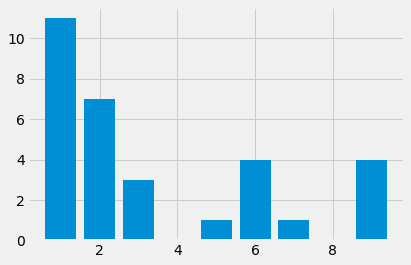

In [33]:
plt.bar(x,y);

In [34]:
lst_firsts = []
for i in range(len(x)):
    for itr in range(y[i]):
        lst_firsts.append(x[i])
lst_firsts

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 5,
 6,
 6,
 6,
 6,
 7,
 9,
 9,
 9,
 9]

In [35]:
def median(lst):
    n = len(lst)
    if n%2 == 0:
        return round((lst[n//2 -1] + lst[n//2])/2, 1)
    else: 
        return lst[n//2]

In [36]:
median(lst_firsts)

2

In [37]:
to_string(df.description.iloc[2])

'nude evening shoot organized by the venerable stan anthony run by t am nguyen friday march 15th two thousand and thirteen two sessions five thirty pm and seven zero pm special event price dollar forty two nude female models ryan erica jay ryan erica jay session one starts at five thirty pm session two starts at seven zero pm featuring a relaxed informal atmosphere models we will book two female figure art nude glamour nude models these will usually be models that we have not worked with previously these are girls that are new to the modeling business although they will all have done a test shoot with anthony or an experienced trusted member of the group we will be trading off experience for variety expect surprises both joyful disappointing no one is confirmed if they have not paid model release and two thousand, two hundred and fifty-seven purchase is required important save money on the next friday shoot by paying for it in cash at this event bring dollar forty in cash to sign up at

### TF-IDF

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [39]:
words1 = to_string(df.description.iloc[2])
words2 = to_string(df.description.iloc[3])
words3 = to_string(df.description.iloc[4])

In [40]:
word_lst = [words1
            , words2
            , words3
           ]
tf_model = TfidfVectorizer()
vectors = tf_model.fit_transform(word_lst)
vectors[0].T.todense()

matrix([[0.        ],
        [0.        ],
        [0.01451841],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.04355522],
        [0.01451841],
        [0.02903682],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.01451841],
        [0.02208325],
        [0.01451841],
        [0.04355522],
        [0.04287403],
        [0.01451841],
        [0.10162886],
        [0.17149612],
        [0.        ],
        [0.01451841],
        [0.10162886],
        [0.01451841],
        [0.        ],
        [0.01451841],
        [0.01451841],
        [0.        ],
        [0.13249948],
        [0.01451841],
        [0.01451841],
        [0.02903682],
        [0.01451841],
        [0.        ],
        [0.01451841],
        [0.01451841],
        [0.06859845],
        [0.01451841],
        [0.01451841],
        [0.04355522],
        [0.02903682],
        [0.04355522],
        [0.01451841],
        [0.        ],
        [0

In [41]:
df['desc_string'] = df.description.apply(to_string)

In [42]:
df.head()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,fraud,desc_string
0,tos_lock,1347148800,23461,8,US,USD,0.0,"<p style=""text-align: center;""><span class=""cf...",certifiedforensicloanauditors.com,1342819690,...,1256576963,1,370 Hughes Center Dr.,US,36.115838,-115.155964,Residents Inn Marriott,NV,0,mortgage securitization auditor training septe...
1,premium,1349938500,3893,0,US,USD,0.0,<p>Celebrate and explore erotic energy and tou...,intimacyforumtraining.com,1349202094,...,1276068046,4,,US,37.906037,-122.544976,"Gorgeous Mountaintop Home, Mill Valley, CA (Pl...",CA,0,celebrate and explore erotic energy and touch ...
2,premium,1363838400,21761,0,US,USD,0.0,"<p style=""margin-bottom: 0.7em; padding-bottom...",gmail.com,1362797769,...,1293986416,3,,US,40.714353,-74.005973,,,0,nude evening shoot organized by the venerable ...
3,premium,1373014800,804,13,US,USD,0.0,<p>$7 in advance!<br />$10 at the door!</p>\r\...,gmail.com,1367871128,...,1355270293,4,112 Esplanade Alley,US,38.044359,-84.494495,Natasha's Bistro & Bar,KY,0,dollar seven in advance dollar ten at the door...
4,premium,1367445600,7193,8,US,USD,1.0,"<p style=""line-height: 1.15; margin-top: 0pt; ...",generalassemb.ly,1365707772,...,1299651441,3,,None,NaN,NaN,None,None,0,fundraising with angellist online class friday...


In [43]:
df.desc_string.iloc[0]

'mortgage securitization auditor training september one three two thousand and twelve las vegas nv certified forensic loan auditors llc has created a comprehensive training certification progr am entitled mortgage securitization auditor msa a twenty-four hour in person intensive seminar held across the country this is a professional development how to training and does not imply any state or federal government affiliation certified forensic loan auditors llc located at thirteen thousand, one hundred and one w washington blvd los angeles ca ninety thousand and sixty-six has pioneered years of research development to produce an intensive certification progr am entitled mortgage securitization auditor msa cfla recognizes the supreme importance of the pursuit of truth devotion to excellence and the nurture of the democratic principles cfla brings accountability trust intelligence and integrity to all parties involved in the mortgage loan audit process these parties include but are not limi

In [44]:
# the following needs up to 55.5 gbs of memory!
# this is the reson for downsampling 

In [45]:
tf_model = TfidfVectorizer()
row_vectors = tf_model.fit_transform(df.desc_string)

word_columns = tf_model.get_feature_names()

dense = row_vectors.todense()

dense_list = dense.tolist()


In [46]:
df_tfidf = pd.DataFrame(dense_list, columns = word_columns)

In [47]:
df_tfidf.shape

(2586, 31050)

In [48]:
df

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,fraud,desc_string
0,tos_lock,1347148800,23461,8,US,USD,0.0,"<p style=""text-align: center;""><span class=""cf...",certifiedforensicloanauditors.com,1342819690,...,1256576963,1,370 Hughes Center Dr.,US,36.115838,-115.155964,Residents Inn Marriott,NV,0,mortgage securitization auditor training septe...
1,premium,1349938500,3893,0,US,USD,0.0,<p>Celebrate and explore erotic energy and tou...,intimacyforumtraining.com,1349202094,...,1276068046,4,,US,37.906037,-122.544976,"Gorgeous Mountaintop Home, Mill Valley, CA (Pl...",CA,0,celebrate and explore erotic energy and touch ...
2,premium,1363838400,21761,0,US,USD,0.0,"<p style=""margin-bottom: 0.7em; padding-bottom...",gmail.com,1362797769,...,1293986416,3,,US,40.714353,-74.005973,,,0,nude evening shoot organized by the venerable ...
3,premium,1373014800,804,13,US,USD,0.0,<p>$7 in advance!<br />$10 at the door!</p>\r\...,gmail.com,1367871128,...,1355270293,4,112 Esplanade Alley,US,38.044359,-84.494495,Natasha's Bistro & Bar,KY,0,dollar seven in advance dollar ten at the door...
4,premium,1367445600,7193,8,US,USD,1.0,"<p style=""line-height: 1.15; margin-top: 0pt; ...",generalassemb.ly,1365707772,...,1299651441,3,,None,NaN,NaN,None,None,0,fundraising with angellist online class friday...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581,fraudster,1343343600,0,0,US,USD,0.0,,yopmail.com,1339478320,...,1339478319,1,,None,NaN,NaN,None,None,1,
2582,fraudster_event,1350097200,7610,0,US,USD,0.0,Booked items\r\n\r\n\r\nYour trip: Midway to ...,hotmail.com,1349651867,...,1334782434,4,5700 S Cicero,US,41.788116,-87.741718,Midway,IL,1,
2583,fraudster_event,1362873600,1535,0,CI,EUR,0.0,"<p>Bonjour,</p>\r\n<p> </p>\r\n<p>Après le suc...",yahoo.fr,1361759035,...,1359400888,1,50 Berners Street,GB,51.517501,-0.136941,london,London,1,bonjour après le succès de l etape de barcelon...
2584,fraudster,1331881200,1001,5,US,USD,0.0,"<p>This red&ndash;tie gala, held at the Please...",aol.com,1330961670,...,1330961669,1,4231 Avenue of the Republic,US,39.979312,-75.209221,,PA,1,this red tie gala held at the please touch mus...


In [49]:
df_tfidf.shape

(2586, 31050)

In [50]:
df.shape

(2586, 46)

In [51]:
df_tfidf = df_tfidf.assign(f = df.fraud)

In [52]:
df_tfidf.shape

(2586, 31051)

In [53]:
df_tfidf

,000sf,000ü,00a,00am7,00amlearn,00amnfci,00amselling,00amtrystan,00amwebinar,00amwith,...,近期得到苏格兰媒体的关注,这一独特课程产品在一定程度上将爱丁堡在地理科学,这是爱丁堡气候变化中心和中国人民大学气候变化与低碳经济研究所长期合作关系的开端,远大,邮箱,陈波,陈波手机,陕西,ﬂat,f
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [54]:
df_tfidf = df_tfidf.sample(frac=1)

In [55]:
df_tfidf

,000sf,000ü,00a,00am7,00amlearn,00amnfci,00amselling,00amtrystan,00amwebinar,00amwith,...,近期得到苏格兰媒体的关注,这一独特课程产品在一定程度上将爱丁堡在地理科学,这是爱丁堡气候变化中心和中国人民大学气候变化与低碳经济研究所长期合作关系的开端,远大,邮箱,陈波,陈波手机,陕西,ﬂat,f
546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
514,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1386,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


### Random Forest Classifier

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X = df_tfidf.drop('f', axis=1)
y = df_tfidf.f
X_train, X_test, y_train, y_test = train_test_split(X
                                                    , y
                                                    , test_size = 0.25
                                                    , random_state = 42
                                                   )

In [58]:
X_train.shape

(1939, 31050)

In [59]:
X_test.shape

(647, 31050)

In [60]:
y_train.shape

(1939,)

In [61]:
y_test.shape

(647,)

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
rf_model = RandomForestClassifier(n_estimators = 200
                                  , bootstrap = True
                                  , max_features = 'sqrt'
                                 )

rf_model.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt', n_estimators=200)

In [64]:
yhat = rf_model.predict(X_test)
rf_probs = rf_model.predict_proba(X_test)[:, 1]

In [65]:
# ROC AUC Score

from sklearn.metrics import roc_auc_score

roc_value = roc_auc_score(y_test, rf_probs)
roc_value

0.8517801857585141

In [66]:
# feature importances

fi = pd.DataFrame({'word': list(X_train.columns)
                   , 'importance': rf_model.feature_importances_
                  }
                 ).sort_values('importance', ascending = False)
fi.head()

,word,importance
2148,and,0.012766
27151,the,0.008941
19357,of,0.008648
2765,at,0.008429
27502,to,0.007154


In [ ]:
# Need to Filter out Stop words

### Check for Benford's Distribution

In [67]:

body_lengths_true = df_true.body_length.values
int(str(body_lengths_true[1])[0])

3

In [68]:
body_lengths_true_first = [int(str(x)[0]) for x in body_lengths_true]

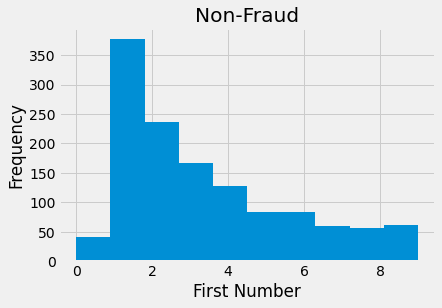

In [69]:
plt.hist(body_lengths_true_first)
plt.ylabel('Frequency')
plt.xlabel('First Number')
plt.title('Non-Fraud');

In [70]:
body_lengths_fraud = df_fraud.body_length.values
body_lengths_fraud_first = [int(str(x)[0]) for x in body_lengths_fraud]

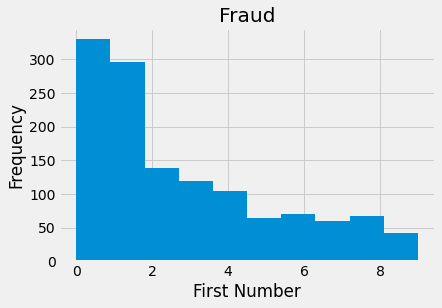

In [71]:
plt.hist(body_lengths_fraud_first)
plt.ylabel('Frequency')
plt.xlabel('First Number')
plt.title('Fraud');

In [72]:
# class imbalance, do over or under sampling. 
# vectorize the words and then add body length to train model 
# use tf-idf, count vectorizer to train the model 